In [14]:
import theano
import theano.tensor as T
import numpy
from numpy import linalg
from matplotlib.patches import  Circle, Arc
import matplotlib.pyplot as plt
%matplotlib inline

from theano import tensor as T
from source.costs import LDS_finite_diff


import os
import errno
def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

def visualize_contour_for_synthetic_dataset(model,d_i,x_data,y_data,basis,with_LDS=False,epsilon=0.5,num_power_iter=5,save_name='prob_cont'):
    
    linewidth = 10
    
    range_x = numpy.arange(-2.0,2.1,0.05)
    A_inv = linalg.inv(numpy.dot(basis,basis.T))
    train_x_org = numpy.dot(x_data,numpy.dot(basis.T,A_inv))
    test_x_org = numpy.zeros((range_x.shape[0]**2,2))
    train_x_1_ind = numpy.where(y_data==1)[0]
    train_x_0_ind = numpy.where(y_data==0)[0]
    
    for i in xrange(range_x.shape[0]):
        for j in xrange(range_x.shape[0]):
            test_x_org[range_x.shape[0]*i+j,0] = range_x[i]
            test_x_org[range_x.shape[0]*i+j,1] = range_x[j]

    test_x =numpy.dot(test_x_org,basis)
    x = T.matrix()
    f_p_y_given_x = theano.function(inputs=[x],outputs=model.forward_test(x))
    pred=f_p_y_given_x(numpy.asarray(test_x,'float32'))[:,1]
    
    Z= numpy.zeros((range_x.shape[0],range_x.shape[0]))
    for i in xrange(range_x.shape[0]):
        for j in xrange(range_x.shape[0]):
            Z[i,j] = pred[range_x.shape[0]*i+j]
    
    Y,X = numpy.meshgrid(range_x,range_x)
    
    fontsize = 20
    rc = 'r'
    bc ='b'
    
    orgfig = plt.figure(figsize=numpy.asarray([9.6,8])*0.5)
    if(d_i == 1):
        rescale = 1.0#/numpy.sqrt(500)
        arc1 =Arc(xy=[0.5*rescale, -0.25*rescale], width=2.0*rescale, height=2.0*rescale,angle=0, theta1=270,theta2=180,linewidth=linewidth,alpha=0.15,color=rc)
        arc2 =Arc(xy=[-0.5*rescale, +0.25*rescale], width=2.0*rescale, height=2.0*rescale,angle=0, theta1=90, theta2=360,linewidth=linewidth,alpha=0.15,color=bc)
        fig = plt.gcf()
        fig.gca().add_artist(arc1)
        fig.gca().add_artist(arc2)
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
    else:
        rescale = 1.0#/numpy.sqrt(500)
        circle1=Circle((0,0),1.0*rescale,color=rc,alpha=0.2,fill=False,linewidth=linewidth)
        circle2 =Circle((0,0),0.15*rescale,color=bc,alpha=0.2,fill=False,linewidth=linewidth)
        fig = plt.gcf()
        fig.gca().add_artist(circle1)
        fig.gca().add_artist(circle2)
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
     
    levels =[0.05,0.2,0.35,0.5,0.65,0.8,0.95]
    cs = plt.contour(X*rescale,Y*rescale,Z,7,cmap='bwr',vmin=0.,vmax=1.0,linewidths=8.,levels=levels)
    cbar = plt.colorbar(cs)
    cbar.ax.tick_params(labelsize=fontsize)
    plt.setp(cs.collections , linewidth=1.0)
    plt.contour(X*rescale,Y*rescale,Z,1,cmap='binary',vmin=0,vmax=0.5,linewidths=2.0)
    
    plt.xlim([-2.*rescale,2.*rescale])
    plt.ylim([-2.*rescale,2.*rescale])
    plt.xticks([-2.0,-1.0,0,1,2.0],fontsize=fontsize)
    plt.yticks([-2.0,-1.0,0,1,2.0],fontsize=fontsize)
    

    #plt.axes().get_xaxis().set_visible(False)
    #plt.axes().get_yaxis().set_visible(False)
    
    plt.scatter(train_x_org[train_x_1_ind,0]*rescale,train_x_org[train_x_1_ind,1]*rescale,s= 100,marker='o',c = rc,label='$y=1$')
    plt.scatter(train_x_org[train_x_0_ind,0]*rescale,train_x_org[train_x_0_ind,1]*rescale,s =100,marker='^',c = bc,label='$y=0$')
    

    if(with_LDS == True):
        x = T.matrix()
        f_LDS = theano.function(inputs=[],
                                outputs = LDS_finite_diff(x=x,
                                                        forward_func=model.forward_test,
                                                        main_obj_type='CE',
                                                        epsilon=epsilon,
                                                        norm_constraint='L2',
                                                        num_power_iter=num_power_iter),
                                givens={x:x_data})
        ave_LDS = numpy.mean([f_LDS().mean() for i in xrange(50)])
        print ave_LDS
        plt.title('Average $\widetilde{\\rm LDS}=%.3f$' %round(ave_LDS,3),fontsize=fontsize)
    make_sure_path_exists("./figure")
    plt.savefig('figure/' + save_name+'.pdf',transparent=True)

   


Layer/Linear
Layer/ReLU
Layer/Linear
Layer/Softmax
Layer/Linear
Layer/ReLU
Layer/Linear
Layer/Softmax
Layer/Linear
Layer/ReLU
Layer/Linear
Layer/Softmax
not include ent term
Layer/Linear
Layer/ReLU
Layer/Linear
Layer/Softmax
not include ent term
Layer/Linear
Layer/ReLU
Layer/Linear
Layer/Softmax
not include ent term
Layer/Linear
Layer/ReLU
Layer/Linear
Layer/Softmax
not include ent term
Layer/Linear
Layer/ReLU
Layer/Linear
Layer/Softmax
not include ent term
perturb:L2
Layer/Linear
Layer/ReLU
Layer/Linear
Layer/Softmax
-0.514421
Layer/Linear
Layer/ReLU
Layer/Linear
Layer/Softmax
Layer/Linear
Layer/ReLU
Layer/Linear
Layer/Softmax
Layer/Linear
Layer/ReLU
Layer/Linear
Layer/Softmax
not include ent term
Layer/Linear
Layer/ReLU
Layer/Linear
Layer/Softmax
not include ent term
Layer/Linear
Layer/ReLU
Layer/Linear
Layer/Softmax
not include ent term
Layer/Linear
Layer/ReLU
Layer/Linear
Layer/Softmax
not include ent term
Layer/Linear
Layer/ReLU
Layer/Linear
Layer/Softmax
not include ent term
pert

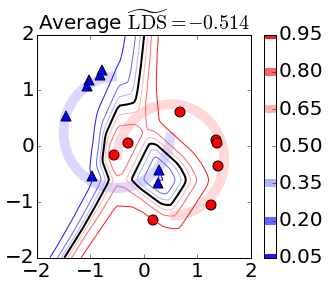

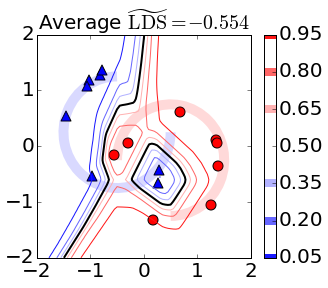

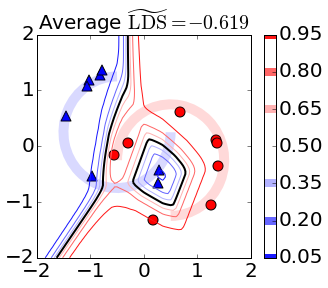

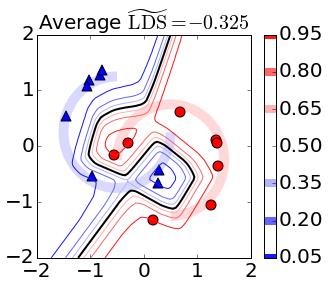

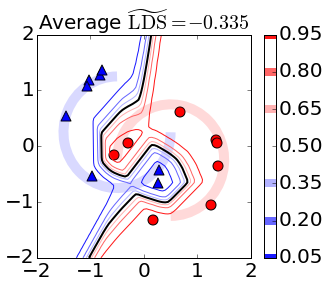

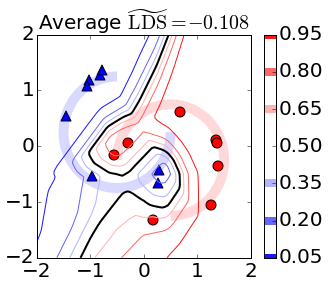

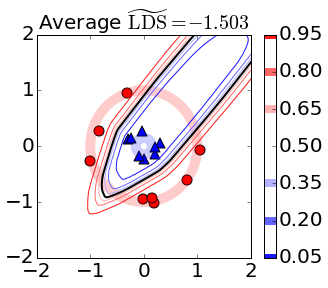

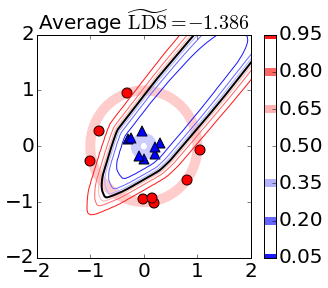

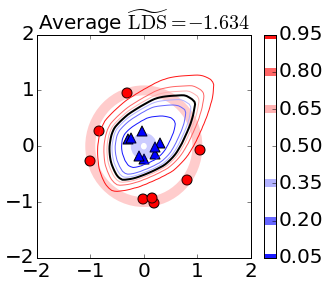

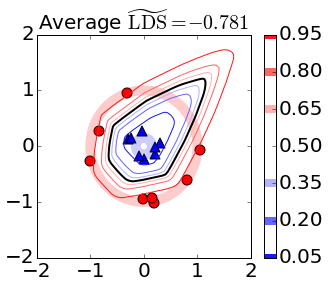

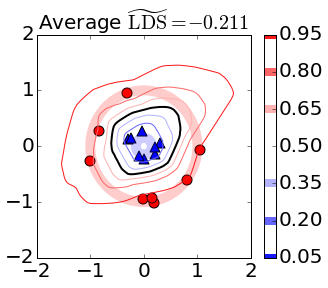

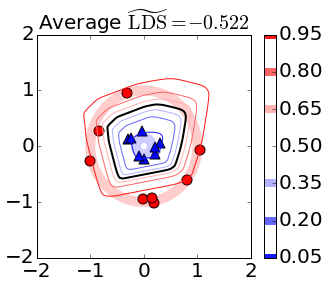

In [15]:
import sys
sys.path.append('/Users/TakeruMiyato/vat/')
import cPickle

for dataset_i in (1,2):
    dataset = cPickle.load(open('dataset/syndata_' +str(dataset_i) + '.pkl'))
    x_train =numpy.asarray(dataset[0][0][0],dtype=theano.config.floatX)
    t_train =  numpy.asarray(dataset[0][0][1],dtype='int32')
    x_valid =  numpy.asarray(dataset[0][1][0],dtype=theano.config.floatX)
    t_valid =  numpy.asarray(dataset[0][1][1],dtype='int32')

    model_MLE = cPickle.load(open('trained_model/MLE_' + str(dataset_i)+ '.pkl'))[0]
    model_L2 = cPickle.load(open('trained_model/L2_' + str(dataset_i)+ '.pkl'))[0]
    model_dropout = cPickle.load(open('trained_model/dropout_' + str(dataset_i)+ '.pkl'))[0]
    model_RP =cPickle.load(open('trained_model/RP_' + str(dataset_i)+ '.pkl'))[0]
    model_AT_L2 = cPickle.load(open('trained_model/AT_' + str(dataset_i)+ '.pkl'))[0]
    model_VAT_I1 = cPickle.load(open('trained_model/VAT_' + str(dataset_i)+ '.pkl'))[0]

    with_LDS = True

    visualize_prob_for_synthetic_dataset(model_MLE,dataset_i,x_train,t_train,dataset[1],with_LDS=with_LDS,save_name='cont_MLE_d' + str(dataset_i))
    visualize_prob_for_synthetic_dataset(model_L2,dataset_i,x_train,t_train,dataset[1],with_LDS=with_LDS,save_name='cont_L2_d'+ str(dataset_i))
    visualize_prob_for_synthetic_dataset(model_dropout,dataset_i,x_train,t_train,dataset[1],with_LDS=with_LDS,save_name='cont_dropout_d'+ str(dataset_i))
    visualize_prob_for_synthetic_dataset(model_RP,dataset_i,x_train,t_train,dataset[1],with_LDS=with_LDS,save_name='cont_RP_d'+ str(dataset_i))
    visualize_prob_for_synthetic_dataset(model_AT_L2,dataset_i,x_train,t_train,dataset[1],with_LDS=with_LDS,save_name='cont_ATL2_d'+ str(dataset_i))
    visualize_prob_for_synthetic_dataset(model_VAT_I1,dataset_i,x_train,t_train,dataset[1],with_LDS=with_LDS,save_name='cont_VATI1_d'+ str(dataset_i))


